Digits dataset keys 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
dataset target name: 
[0 1 2 3 4 5 6 7 8 9]
shape of datset: (1797, 64) 
and target: (1797,)
shape of the images: (1797, 8, 8)


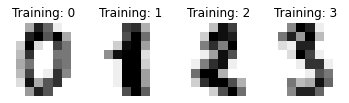

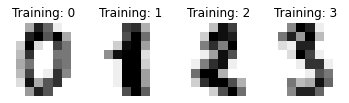

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        42
           3       0.98      1.00      0.99        44
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        57
           8       0.98      1.00      0.99        40
           9       1.00      0.95      0.97        41

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450


Confusion matrix:
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
# load the digits dataset
digits = datasets.load_digits()
print('Digits dataset keys \n{}'.format(digits.keys()))
print('dataset target name: \n{}'.format(digits.target_names))
print('shape of datset: {} \nand target: {}'.format(digits.data.shape, digits.target.shape))
print('shape of the images: {}'.format(digits.images.shape))
#plot the data, which is just the images flattened into a 1-d array
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('off')
    imside = int(np.sqrt(digits.data[i].shape[0]))
    im1 = np.reshape(digits.data[i],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()
#the images are also included in the dataset as digits.images
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('off')
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()
#from here we will be using the images. First we should flatten the images
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images,digits.target)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)


# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))